# Scénario

Our client, PowerCo, is a major utility company providing gas and electricity to corporate,
SME and residential customers. In recent years, post-liberalization of the energy market in
Europe, PowerCo has had a growing problem with increasing customer defections above
industry average. Thus PowerCo has asked BCG to work alongside them to identify the
drivers of this problem and to devise and implement a strategy to counter it. The churn issue
is most acute in the SME division and thus they want it to be the first priority

The head of the SME division has asked whether it is possible to 
predict the customers which
are most likely to churn so that they can trial a range of pre-emptive actions. He has a
hypothesis that clients are switching to cheaper providers so the first action to be trialed will
be to offer customers with high propensity of churning a 20% discount.

For training your model you are provided with a dataset which includes features of SME customers in January 2016 as well as the information about whether or not they have churned by March 2016. In addition to that you have received the prices from 2015 for these customers. Of particular interest for the
client is how you frame the problem for training.

# Data Discovery : 

In [1]:
ls

Machine Learning Case_PowerCo/     PowerCo.ipynb
Machine Learning Case_PowerCo.pdf  Untitled.ipynb
Machine Learning Case_PowerCo.zip


In [2]:
ls Machine\ Learning\ Case_PowerCo/ml_case_data

ml_case_test_data.csv             ml_case_training_hist_data.csv
ml_case_test_hist_data.csv        ml_case_training_output.csv
ml_case_test_output_template.csv  temp-plot.html
ml_case_training_data.csv


In [3]:
cd Machine\ Learning\ Case_PowerCo/ml_case_data/

/home/siham/Siham_repo/BCG/Machine Learning Case_PowerCo/ml_case_data


In [4]:
!head -n3 ml_case_training_data.csv

In [5]:
!head -n3 ml_case_training_hist_data.csv

In [6]:
!head -n3 ml_case_training_output.csv

In [7]:
!head -n3 ml_case_test_output_template.csv

## Importing packages :

In [8]:
import pandas as pd
from __future__ import division
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

## Training data : 

In [9]:
training_data_1 = pd.read_csv('ml_case_training_data.csv', index_col='id')
print "Number of observations is {} and the number of features is {}".format(training_data_1.shape[0], training_data_1.shape[1])
training_data_1.head(5)

Number of observations is 16096 and the number of features is 31


,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,...,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
id,,,,,,,,,,,,,,,,,,,,,
48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,...,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,...,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,...,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,...,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,...,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


In [10]:
training_data_2 = pd.read_csv('ml_case_training_hist_data.csv', index_col='id')
print "Number of observations is {} and the number of features is {}".format(training_data_2.shape[0], training_data_2.shape[1])
training_data_2.head(5)

Number of observations is 193002 and the number of features is 7


,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
id,,,,,,,
038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [11]:
training_data_2 = training_data_2[training_data_2.price_p1_var.isnull() == False]
training_data_2.shape

(191643, 7)

In [12]:
training_data_2.ix['ffb4cc329aa82acbff38d74b64a47705']      

/home/siham/siham_env/lib/python2.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
id,,,,,,,
ffb4cc329aa82acbff38d74b64a47705,2015-01-01,0.130144,0.108020,0.074278,40.565969,24.339581,16.226389
ffb4cc329aa82acbff38d74b64a47705,2015-02-01,0.130144,0.108020,0.074278,40.565969,24.339581,16.226389
ffb4cc329aa82acbff38d74b64a47705,2015-03-01,0.131032,0.108896,0.076955,40.565969,24.339581,16.226389
ffb4cc329aa82acbff38d74b64a47705,2015-04-01,0.131032,0.108896,0.076955,40.565969,24.339581,16.226389
ffb4cc329aa82acbff38d74b64a47705,2015-06-01,0.131032,0.108896,0.076955,40.565973,24.339578,16.226383
ffb4cc329aa82acbff38d74b64a47705,2015-07-01,0.131032,0.108896,0.076955,40.565973,24.339578,16.226383
ffb4cc329aa82acbff38d74b64a47705,2015-08-01,0.122871,0.104727,0.076901,40.565973,24.339578,16.226383
ffb4cc329aa82acbff38d74b64a47705,2015-11-01,0.122871,0.104727,0.076901,40.565973,24.339578,16.226383
ffb4cc329aa82acbff38d74b64a47705,2015-12-01,0.122871,0.104727,0.076901,40.565973,24.339578,16.226383


In [13]:
#training_data_2.price_p1_fix - (training_data_2.price_p2_fix + training_data_2.price_p3_fix)

In [14]:
training_data_3 = pd.read_csv("ml_case_training_output.csv", index_col="id")
training_data_3.head()

,churn
id,
48ada52261e7cf58715202705a0451c9,0
24011ae4ebbe3035111d65fa7c15bc57,1
d29c2c54acc38ff3c0614d0a653813dd,0
764c75f661154dac3a6c254cd082ea7d,0
bba03439a292a1e166f80264c16191cb,0


In [15]:
print (training_data_3.shape, training_data_3[training_data_3.churn == 1].shape)
training_data_3[training_data_3.churn == 1].shape[0]/training_data_3.shape[0] * 100

((16096, 1), (1595, 1))


9.909294234592446

### ==> Imbalanced Data : 10% de la base seulement sont des clients churneurs

# Merging data : 

In [16]:
merged = training_data_1.merge(training_data_3, right_index = True, left_index = True)

                          Missing Ratio
campaign_disc_ele            100.000000
forecast_bill_12m             78.205765
forecast_cons                 78.205765
date_first_activ              78.205765
forecast_base_bill_ele        78.205765
forecast_base_bill_year       78.205765
activity_new                  59.300447
channel_sales                 26.205268
date_modif_prod                0.975398
forecast_price_energy_p1       0.782803
forecast_discount_energy       0.782803
forecast_price_energy_p2       0.782803
forecast_price_pow_p1          0.782803
origin_up                      0.540507
date_renewal                   0.248509
net_margin                     0.093191
margin_gross_pow_ele           0.080765
margin_net_pow_ele             0.080765
pow_max                        0.018638
date_end                       0.012425


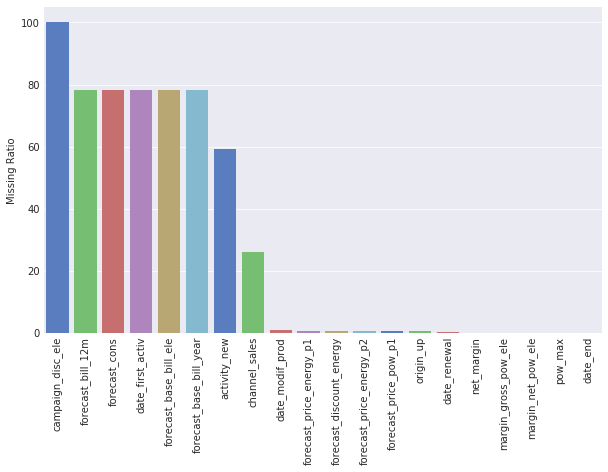

In [17]:
all_data_na = (merged.isnull().sum() / len(merged)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
mis_columns =  list(missing_data[missing_data["Missing Ratio"] > 59].index)
print missing_data.head(20)

sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
bar_plot = sns.barplot(x=missing_data.index,y=missing_data["Missing Ratio"],
                        palette="muted")

plt.xticks(rotation=90)
plt.show()

In [18]:
## Dropping columns with missing values ratio > 59%
merged.drop(['campaign_disc_ele','forecast_bill_12m','forecast_cons','date_first_activ','forecast_base_bill_ele','forecast_base_bill_year','activity_new'], axis = 1, inplace= True)
merged.shape

(16096, 25)

In [19]:
merged.columns

Index([u'channel_sales', u'cons_12m', u'cons_gas_12m', u'cons_last_month',
       u'date_activ', u'date_end', u'date_modif_prod', u'date_renewal',
       u'forecast_cons_12m', u'forecast_cons_year',
       u'forecast_discount_energy', u'forecast_meter_rent_12m',
       u'forecast_price_energy_p1', u'forecast_price_energy_p2',
       u'forecast_price_pow_p1', u'has_gas', u'imp_cons',
       u'margin_gross_pow_ele', u'margin_net_pow_ele', u'nb_prod_act',
       u'net_margin', u'num_years_antig', u'origin_up', u'pow_max', u'churn'],
      dtype='object')

In [20]:
merged.dtypes

channel_sales                object
cons_12m                      int64
cons_gas_12m                  int64
cons_last_month               int64
date_activ                   object
date_end                     object
date_modif_prod              object
date_renewal                 object
forecast_cons_12m           float64
forecast_cons_year            int64
forecast_discount_energy    float64
forecast_meter_rent_12m     float64
forecast_price_energy_p1    float64
forecast_price_energy_p2    float64
forecast_price_pow_p1       float64
has_gas                      object
imp_cons                    float64
margin_gross_pow_ele        float64
margin_net_pow_ele          float64
nb_prod_act                   int64
net_margin                  float64
num_years_antig               int64
origin_up                    object
pow_max                     float64
churn                         int64
dtype: object

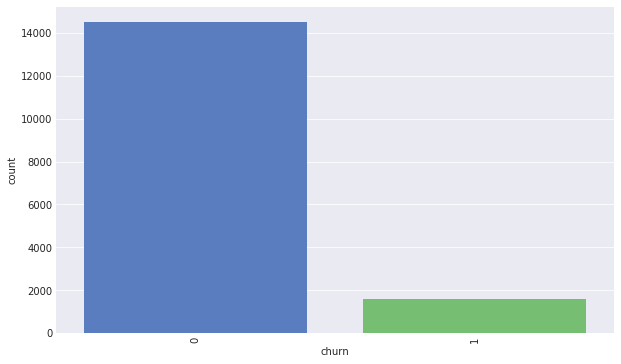

In [21]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,6))
bar_plot = sns.countplot(x=merged.churn,
                        palette="muted")

plt.xticks(rotation=90)
plt.show()

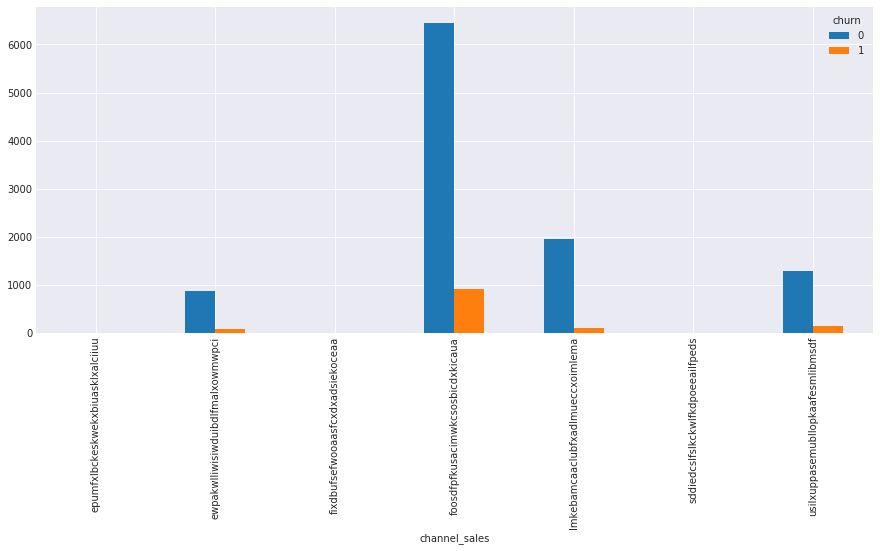

In [50]:
pd.crosstab(merged.channel_sales,merged.churn).plot(kind='bar',figsize=(15,6))

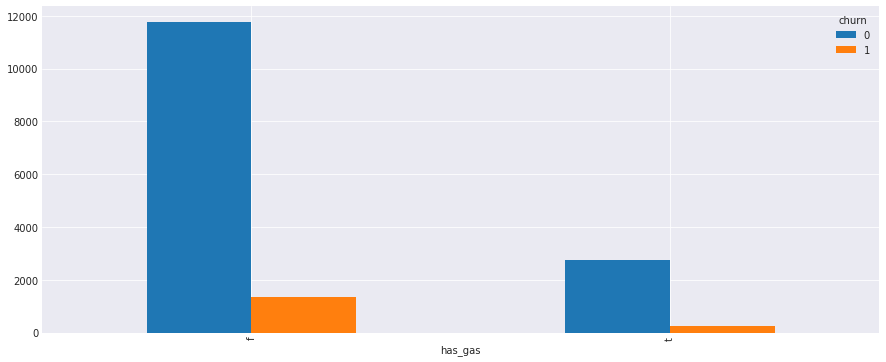

In [51]:
pd.crosstab(merged.has_gas,merged.churn).plot(kind='bar',figsize=(15,6))

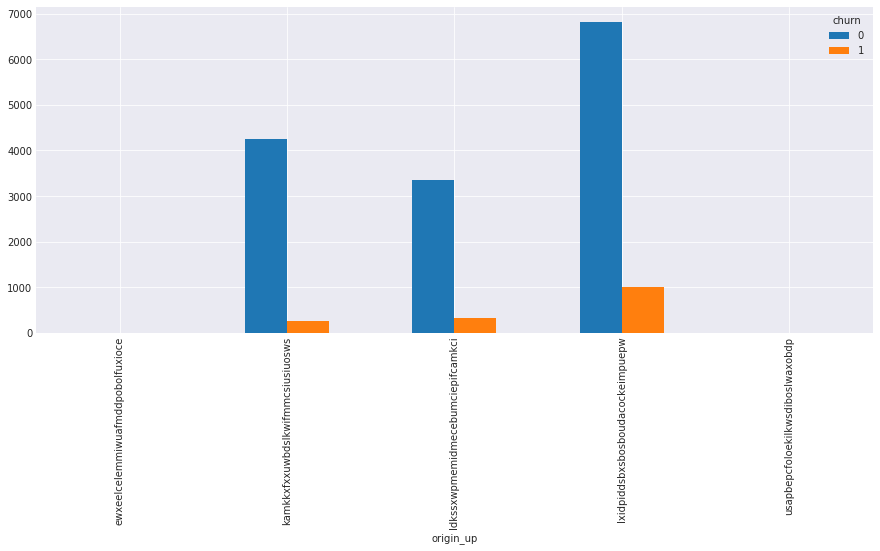

In [52]:
pd.crosstab(merged.origin_up,merged.churn).plot(kind='bar',figsize=(15,6))

In [24]:
merged[merged.churn == 0].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.450100e+04,1.450100e+04,1.450100e+04,14501.000000,14501.000000,14421.000000,14501.000000,14421.000000,14421.000000,14421.000000,14501.000000,14488.000000,14488.000000,14501.000000,14486.000000,14501.000000,14498.000000,14501.0
mean,2.064686e+05,3.431931e+04,2.074335e+04,2360.659598,1902.542032,0.970668,69.524497,0.135929,0.052543,43.526605,195.563286,21.831935,20.875035,1.358734,214.420518,5.070409,20.535843,0.0
std,7.084568e+05,1.860753e+05,8.614061e+04,3985.065460,5001.109911,5.112158,76.940134,0.026317,0.048548,5.325953,475.032779,22.580035,26.928157,1.525549,307.624318,1.679062,21.948308,0.0
min,-1.169570e+05,-3.037000e+03,-9.138600e+04,-16689.260000,-85627.000000,0.000000,-242.960000,0.000000,0.000000,-0.122184,-9038.210000,-525.540000,-615.660000,1.000000,-4148.990000,1.000000,1.000000,0.0
25%,5.918000e+03,0.000000e+00,0.000000e+00,514.790000,0.000000,0.000000,16.220000,0.115237,0.000000,40.606701,0.000000,11.820000,11.590000,1.000000,51.912500,4.000000,12.500000,0.0
50%,1.536600e+04,0.000000e+00,9.250000e+02,1178.960000,383.000000,0.000000,19.380000,0.142881,0.085803,44.311378,44.750000,20.520000,20.430000,1.000000,118.730000,5.000000,13.856000,0.0
75%,5.066200e+04,0.000000e+00,4.209000e+03,2687.160000,2004.000000,0.000000,131.420000,0.146348,0.098837,44.311378,219.100000,28.600000,28.560000,1.000000,273.365000,6.000000,19.800000,0.0
max,1.609711e+07,4.188440e+06,4.538720e+06,103801.930000,175375.000000,50.000000,1052.390000,0.273963,0.195975,59.444710,15042.790000,374.640000,374.640000,32.000000,10203.500000,16.000000,500.000000,0.0


In [25]:
merged[merged.churn == 1].describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.595000e+03,1595.000000,1595.000000,1595.000000,1595.000000,1549.000000,1595.000000,1549.000000,1549.000000,1549.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.000000,1595.0
mean,8.875863e+04,10022.208150,7807.845768,2460.528978,1951.033856,1.185926,77.450871,0.135633,0.056748,43.597652,201.216169,28.187912,26.776665,1.248276,250.378539,4.668966,21.224839,1.0
std,2.900448e+05,54312.082719,28919.448358,4464.574325,7181.095468,5.593027,95.641798,0.025646,0.049115,4.002373,644.218217,31.577247,35.235577,0.579709,704.058290,1.604810,20.099010,0.0
min,-1.252760e+05,-617.000000,-11825.000000,-10037.370000,-19057.000000,0.000000,-0.500000,0.092453,0.000000,32.583108,-1824.080000,-341.220000,-341.220000,1.000000,-3711.400000,2.000000,3.300000,1.0
25%,5.836000e+03,0.000000,0.000000,500.740000,0.000000,0.000000,16.300000,0.115237,0.000000,40.606701,0.000000,15.500000,15.445000,1.000000,52.605000,4.000000,13.150000,1.0
50%,1.513400e+04,0.000000,747.000000,1188.800000,347.000000,0.000000,23.300000,0.141666,0.088444,44.311378,42.400000,25.840000,25.800000,1.000000,129.320000,4.000000,14.490000,1.0
75%,4.620250e+04,0.000000,3471.000000,2760.105000,1912.500000,0.000000,132.120000,0.145711,0.099419,44.311378,211.355000,34.500000,34.440000,1.000000,297.545000,6.000000,20.700000,1.0
max,4.012564e+06,828344.000000,469898.000000,66521.260000,155432.000000,30.000000,2411.690000,0.273963,0.168092,59.266378,13001.820000,299.640000,299.640000,5.000000,24570.650000,13.000000,320.000000,1.0


In [60]:
#plt.figure(figsize=(5,5))
#bar_plot = sns.boxplot(x="churn", y="cons_last_month", data=merged,
#                       palette="muted")

#plt.show()

In [ ]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
print __version__ # requires version >= 1.9.0

plotly.offline.init_notebook_mode(connected=True)

plotly.tools.set_credentials_file(username='helabouda', api_key='5cziCdJut9qOdmXKHu3B', stream_ids="l0d31mal6y", proxy_username="siham_laaroussi", proxy_password="@Carrouf012.")

In [56]:
trace = go.Scatter(
    x=merged.cons_12m,
    y=merged.forecast_cons_12m,
    mode ='markers'
)

data = [trace]

plotly.offline.iplot(data)

2.5.1


In [57]:
trace0 = go.Scatter(
    x=merged[merged.churn == 0].cons_12m,
    y=merged[merged.churn == 0].forecast_cons_12m,
    mode ='markers',
    name= 'non Churners',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)


trace1 = go.Scatter(
    x=merged[merged.churn == 1].cons_12m,
    y=merged[merged.churn == 1].forecast_cons_12m,
    mode ='markers',
    name= 'Churners',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [trace0, trace1]

plotly.offline.iplot(data)

In [59]:
trace0 = go.Scatter(
    x=merged[merged.churn == 0].cons_last_month,
    y=merged[merged.churn == 0].imp_cons,
    mode ='markers',
    name= 'non Churners',
    marker = dict(
        size = 10,
        color = 'rgba(152, 0, 0, .8)',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)


trace1 = go.Scatter(
    x=merged[merged.churn == 1].cons_last_month,
    y=merged[merged.churn == 1].imp_cons,
    mode ='markers',
    name= 'Churners',
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )
)

data = [trace0, trace1]

plotly.offline.iplot(data)